In [1]:
using Pkg
Pkg.add("GaussianProcesses")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [6]:
using CSV
using Distributions
using GaussianProcesses
using Plots
using Statistics

In [3]:
rbf = SEIso(log(1/sqrt(2)), 0.0)
xs = [1, 2, 3, 4]
cov(rbf, xs, xs)

1.0

In [4]:
xs = reshape([1.0, 2, 3, 4], 1, :)
cov(rbf, xs, xs)

4×4 Array{Float64,2}:
 1.0         0.367879   0.0183156  0.00012341
 0.367879    1.0        0.367879   0.0183156 
 0.0183156   0.367879   1.0        0.367879  
 0.00012341  0.0183156  0.367879   1.0       

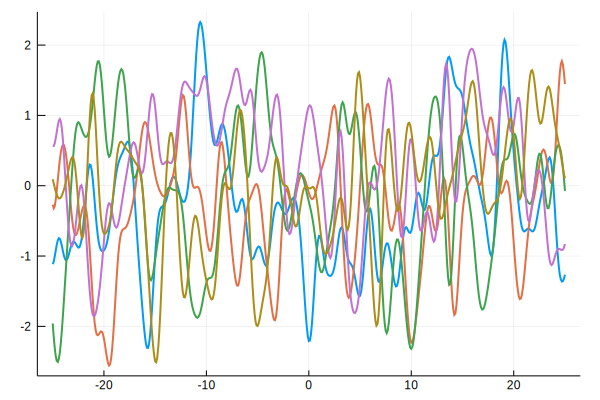

In [5]:
xs = -25:0.1:25
gp_rbf = GPE(kernel = rbf)
samples = rand(gp_rbf, xs, 5)
plot(xs, samples, label = "", lw = 2)
# savefig(plot(xs, samples, label = "", lw = 2), "fig.svg")

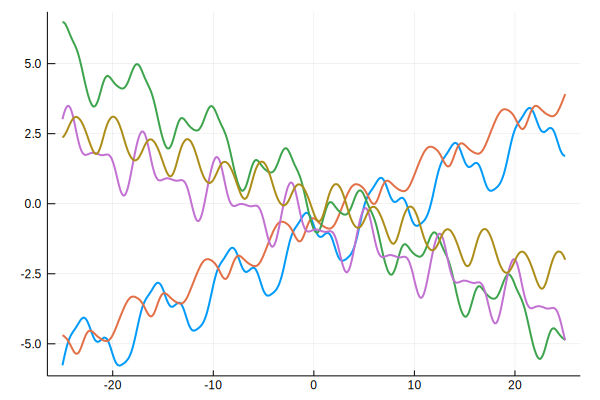

In [6]:
kernel_sum = Lin(2.0) + Periodic(0.0, 0.0, 2.0)
gp_sum = GPE(kernel = kernel_sum)
samples = rand(gp_sum, xs, 5)
plot(xs, samples, label = "", lw = 2)

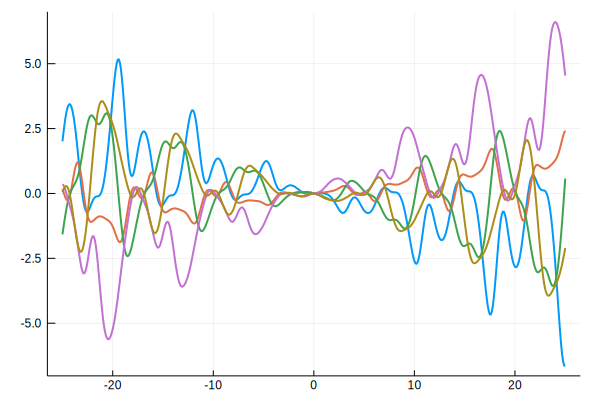

In [7]:
kernel_prod = Lin(2.0) * Periodic(0.0, 0.0, 2.0)
gp_prod = GPE(kernel = kernel_prod)
samples = rand(gp_prod, xs, 5)
plot(xs, samples, label = "", lw = 2)

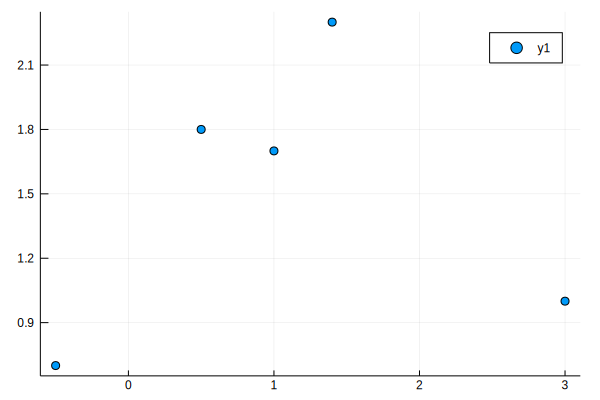

In [10]:
xxs = [-0.5, 0.5, 1, 1.4, 3]
yys = [0.7, 1.8, 1.7, 2.3, 1]

scatter(xxs, yys)

In [13]:
gp = GP(xxs, yys, MeanZero(), SE(0.0, 0.0))
optimize!(gp)

Results of Optimization Algorithm
 * Algorithm: L-BFGS
 * Starting Point: [-2.0,0.0,0.0]
 * Minimizer: [-1.250611250087999,0.5939445695924219, ...]
 * Minimum: 5.464078e+00
 * Iterations: 10
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: false 
     |x - x'| = 1.80e-09 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: false
     |f(x) - f(x')| = 1.63e-16 |f(x)|
   * |g(x)| ≤ 1.0e-08: true 
     |g(x)| = 1.23e-14 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 26
 * Gradient Calls: 26

In [14]:
print(gp)

GP Exact object:
  Dim = 1
  Number of observations = 5
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [0.593945, 0.233886]
  Input observations = 
[-0.5 0.5 1.0 1.4 3.0]
  Output observations = [0.7, 1.8, 1.7, 2.3, 1.0]
  Variance of observation noise = 0.08198471101193598
  Marginal Log-Likelihood = -5.464

In [32]:
println("theta1: ", gp.kernel.σ2)
println("theta2: ", gp.kernel.ℓ2 * 2)

theta1: 1.5964347486496255
theta2: 6.560299908989858


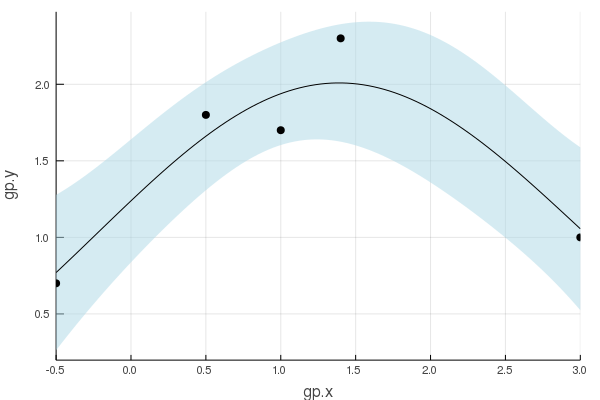

In [39]:
plot(gp; xlabel="gp.x", ylabel="gp.y", legend=false, fmt=:png)

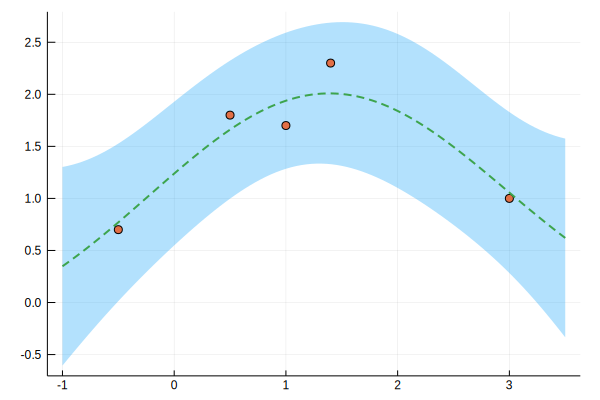

In [44]:
xtest = reshape(collect(range(-1, stop = 3.5, length = 100)), 1, :)
μ, σ2 = predict_y(gp, xtest)
dists = Normal.(μ, sqrt.(σ2))

p = [0.025, 0.975]
qt = hcat(map(x -> quantile.(x, p), dists)...)

plot(xtest[:], qt[1, :], fillrange = qt[2, :], fillalpha = 0.3,
    label = "", linewidth = 0)
scatter!(xxs, yys, label = "")
plot!(xtest[:], mean.(dists), linewidth = 2, 
      linestyle = :dash, label = "")

GP Exact object:
  Dim = 1
  Number of observations = 10
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [-0.532623, 0.210834]
  Input observations = 
[-0.5 0.5 1.0 1.4 3.0 2.3 2.5 1.5 1.1 0.7]
  Output observations = [0.7, 1.8, 1.7, 2.3, 1.0, 0.0, 0.2, 2.0, 2.4, 1.5]
  Variance of observation noise = 0.06701316899893495
  Marginal Log-Likelihood = -10.444

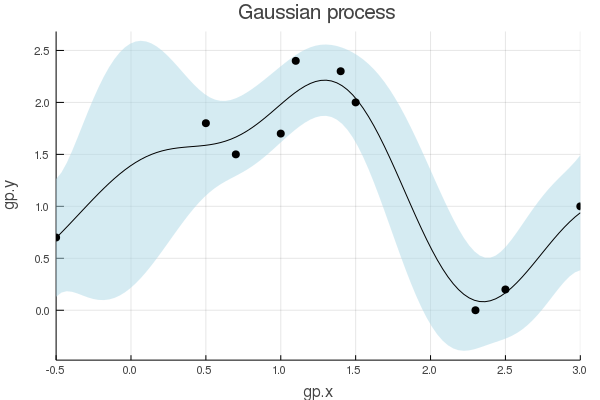

In [17]:
xxs = [-0.5, 0.5, 1, 1.4, 3, 2.3, 2.5, 1.5, 1.1, 0.7]
yys = [0.7, 1.8, 1.7, 2.3, 1, 0, 0.2, 2, 2.4, 1.5]

gp = GP(xxs, yys, MeanZero(), SE(0.0, 0.0))
optimize!(gp)
print(gp)
plot(gp; β=0.975, xlabel="gp.x", ylabel="gp.y", title="Gaussian process", legend=false, fmt=:png)